### Evaluating sequencing results for JPEG experimental run

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import get_fastq_records, reverse_complement, create_fasta_file, remove_adapters_zero_error
from clustering import Clustering
from strand_reconstruction import align
import matplotlib.pyplot as plt
import pandas as pd
from checksum import CheckSum4
import uuid
import os
from tqdm import tqdm
from Levenshtein import distance, ratio
from Bio import Align
import numpy as np

In [3]:
filepath = r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\1_Twist 1\1_Twist.fastq"

In [6]:
records = []
records.extend(get_fastq_records(filepath))

113433it [00:06, 18863.48it/s]


In [ ]:
""" For the other data
records = []
for file in tqdm(os.listdir(filepath)):
    records.extend(get_fastq_records(os.path.join(filepath, file)))
    print(len(records))
"""

In [8]:
strand_pool = [str(i.seq) for i in records]
strand_ids = [str(i.id) for i in records]

### Clustering

In [9]:
# Original file
df = pd.read_csv(r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEG\files 2\cat_FFDX_checksum.csv")
original_strands = df['seq'].tolist()

In [10]:
## Removing strand pool primers

def remove_adapters_alignment(strand_pool, strand_ids):
    
    front_adapter = 'CATGAAGTGGAGTAGCGGCG'
    reverse_adapter = 'GCGACCGATGCTCACTGATC'
    #'GCGACCGATGCTCACTGATC'  #GATCAGTGAGCATCGGTCGC

    #front_adapter = 'AATGTACTTCGTTCAGTTACGTATTGCT'  # badread adapters
    #reverse_adapter = 'GCAATACGTAACTGAACGAAGT'

    rev_front = reverse_complement(reverse_adapter)
    rev_back = reverse_complement(front_adapter)

    cleaned_strand_pool = []
    cleaned_strand_ids = []

    for ind, i in tqdm(enumerate(strand_pool), total=len(strand_pool)):

        t1 = align(i[:25], front_adapter)

        t2 = align(i[:25], rev_front)

        if t1.score >= t2.score:  # Forward adapter
            cleaned_strand = i[t1.indices[0][-1]:]
            print(len(cleaned_strand))
            t1 = align(cleaned_strand[-25:], reverse_adapter)
            cleaned_strand = cleaned_strand[:-25 + t1.indices[0][0]]
            

        else:
            cleaned_strand = i[t2.indices[0][-1]:]
            t2 = align(cleaned_strand[-25:], rev_back)
            cleaned_strand = cleaned_strand[:-25 + t2.indices[0][0]]
            cleaned_strand = reverse_complement(cleaned_strand)

        cleaned_strand_pool.append(cleaned_strand)
        cleaned_strand_ids.append(strand_ids[ind])

    return cleaned_strand_pool, cleaned_strand_ids

In [9]:
from utils import remove_adapters_zero_error

In [11]:
strand_pool = [i for i in strand_pool if len(i) > 230 and len(i) < 260]

In [ ]:
cleaned_strand_pool, cleaned_strand_ids = remove_adapters_alignment(strand_pool[:20000], ["" for i in range(len(strand_pool))])

In [17]:
[len(i) for i in cleaned_strand_pool]

[200,
 198,
 200,
 190,
 200,
 200,
 200,
 198,
 197,
 200,
 203,
 201,
 200,
 195,
 201,
 197,
 200,
 198,
 197,
 200,
 183,
 199,
 194,
 194,
 198,
 202,
 200,
 202,
 189,
 199,
 201,
 199,
 200,
 195,
 200,
 200,
 200,
 194,
 199,
 201,
 200,
 198,
 200,
 197,
 203,
 209,
 199,
 201,
 206,
 200,
 198,
 209,
 205,
 181,
 198,
 203,
 192,
 202,
 198,
 200,
 200,
 197,
 187,
 200,
 203,
 0,
 201,
 201,
 200,
 199,
 199,
 195,
 205,
 198,
 196,
 198,
 196,
 190,
 203,
 202,
 201,
 191,
 200,
 210,
 198,
 201,
 200,
 198,
 198,
 0,
 202,
 188,
 189,
 183,
 190,
 198,
 198,
 205,
 198,
 209,
 194,
 189,
 197,
 200,
 205,
 201,
 200,
 185,
 197,
 198,
 201,
 200,
 200,
 200,
 199,
 200,
 203,
 199,
 196,
 198,
 198,
 200,
 204,
 200,
 200,
 197,
 189,
 194,
 201,
 205,
 197,
 198,
 200,
 200,
 190,
 200,
 201,
 199,
 200,
 200,
 200,
 201,
 199,
 200,
 200,
 200,
 200,
 200,
 204,
 198,
 197,
 200,
 198,
 204,
 198,
 201,
 197,
 198,
 200,
 200,
 203,
 200,
 196,
 201,
 200,
 200,
 198,
 2

In [28]:
cleaned_strand_pool_, cleaned_strand_ids_ = remove_adapters_zero_error(strand_pool[:20000], ["" for i in range(len(strand_pool))])

In [19]:
[len(i) for i in cleaned_strand_pool_]

[208,
 206,
 208,
 208,
 208,
 205,
 208,
 209,
 208,
 203,
 209,
 208,
 208,
 207,
 210,
 208,
 210,
 207,
 209,
 207,
 208,
 203,
 208,
 208,
 208,
 207,
 209,
 206,
 208,
 207,
 214,
 208,
 206,
 206,
 211,
 210,
 208,
 208,
 205,
 208,
 211,
 208,
 207,
 207,
 204,
 210,
 209,
 208,
 218,
 206,
 208,
 206,
 206,
 213,
 202,
 208,
 213,
 209,
 208,
 205,
 206,
 209,
 208,
 208,
 208,
 207,
 208,
 207,
 204,
 206,
 206,
 208,
 208,
 208,
 205,
 206,
 208,
 208,
 209,
 207,
 208,
 208,
 208,
 207,
 208,
 208,
 208,
 208,
 205,
 208,
 206,
 209,
 206,
 208,
 208,
 208,
 209,
 208,
 208,
 211,
 203,
 208,
 208,
 208,
 208,
 208,
 208,
 209,
 207,
 207,
 208,
 209,
 207,
 210,
 208,
 208,
 208,
 209,
 207,
 208,
 208,
 208,
 210,
 204,
 208,
 208,
 208,
 209,
 211,
 207,
 208,
 205,
 207,
 207,
 208,
 208,
 208,
 208,
 206,
 208,
 203,
 208,
 208,
 208,
 208,
 208,
 208,
 205,
 208,
 208,
 208,
 208,
 207,
 208,
 207,
 208,
 208,
 208,
 210,
 208,
 207,
 209,
 207,
 208,
 208,
 206,
 208

In [22]:
strand_pool = [i for i in strand_pool if len(i) < 260 and len(i) > 210]

In [33]:
from Bio.Align import PairwiseAligner
# Create the aligner
aligner = PairwiseAligner()
aligner.mode = 'local'  # local alignment
aligner.match_score = 2
aligner.mismatch_score = -1
aligner.open_gap_score = -2
aligner.extend_gap_score = -0.5

In [12]:
from pool_preprocessing import remove_adapter

In [13]:
front_adapter = 'CATGAAGTGGAGTAGCGGCG'
reverse_adapter = 'GCGACCGATGCTCACTGATC'
#'GCGACCGATGCTCACTGATC'  #GATCAGTGAGCATCGGTCGC

#front_adapter = 'AATGTACTTCGTTCAGTTACGTATTGCT'  # badread adapters
#reverse_adapter = 'GCAATACGTAACTGAACGAAGT'

rev_front = reverse_complement(reverse_adapter)
rev_back = reverse_complement(front_adapter)

In [14]:
cleaned_strand_pool = []

for ind, i in tqdm(enumerate(strand_pool), total=len(strand_pool)):
    # Align primer to sequence
    
    t1 = remove_adapter(i[:25], front_adapter)
    t2 = remove_adapter(i[:25], rev_front)

    if t1 > t2:
        cleaned_strand = i[t1:]
        t1 = remove_adapter(cleaned_strand[-25:][::-1], reverse_adapter[::-1])
        cleaned_strand = cleaned_strand[:-t1]
    else:
        cleaned_strand = i[t2:]
        t2 = remove_adapter(cleaned_strand[-25:][::-1], rev_back[::-1])
        cleaned_strand = cleaned_strand[:-t2]
        cleaned_strand = reverse_complement(cleaned_strand)
        
    cleaned_strand_pool.append(cleaned_strand)


100%|██████████| 85254/85254 [00:11<00:00, 7124.13it/s]


In [16]:
strand_pool_ids = [str(uuid.uuid4()) for i in range(len(cleaned_strand_pool))]

In [17]:
original_strands_no_checksum = [i[:-4] for i in original_strands]

In [18]:
percentages = np.arange(1, 10, 1)

In [19]:
import random

### Progressive clustering

In [21]:

found_strands_arr = []

for percentage in tqdm(percentages):
    len_strand_pool = len(cleaned_strand_pool)
    n_strands = int(len_strand_pool * percentage / 100)
    sampled_pool = np.random.choice(cleaned_strand_pool, n_strands)

    cluster_obj = Clustering(strand_pool=sampled_pool, reference_length=190, n_reference_strands=1031, distance_threshold=15)
    cluster_obj.run_pipeline()
    checksum_obj = CheckSum4(reference_length=204)
    valid_checksums, found_indices = checksum_obj.decode(candidates=cluster_obj.candidates, n_reference_strands=1004, clustered_seqs=cluster_obj.clustered_seqs, n_guesses=5, guesses=False)
    
    found_strands = len(set(valid_checksums).intersection(set(original_strands_no_checksum)))
    checksum_ids = [str(uuid.uuid4()) for i in range(len(valid_checksums))]
    
    create_fasta_file(ids=checksum_ids, strands=valid_checksums, output_filepath=rf'C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\{percentage}_decoded.fasta')
    
    print()
    print(f"{percentage}% of strand pool, {found_strands} strands found")
    print()

    found_strands_arr.append(found_strands)

  0%|          | 0/9 [00:00<?, ?it/s]

Clustering strands
Total strands 852


100%|██████████| 852/852 [00:03<00:00, 234.10it/s]


Number of clusters = 587
Clusters are sorted
Orientation fixed in the strand pool
Generating 1131 candidates


 11%|█         | 1/9 [00:21<02:54, 21.76s/it]

129 direct checksum matches found
0 extra found after guessing
0.0 were reversed
129 Valid checksum strands found
File saved as C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\1_decoded.fasta

1% of strand pool, 124 strands found

Clustering strands
Total strands 1705


100%|██████████| 1705/1705 [00:06<00:00, 251.62it/s]


Number of clusters = 950
Clusters are sorted
Orientation fixed in the strand pool
Generating 1131 candidates


 22%|██▏       | 2/9 [00:59<03:38, 31.19s/it]

241 direct checksum matches found
0 extra found after guessing
0.004149377593360996 were reversed
241 Valid checksum strands found
File saved as C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\2_decoded.fasta

2% of strand pool, 229 strands found

Clustering strands
Total strands 2557


100%|██████████| 2557/2557 [00:12<00:00, 207.02it/s]


Number of clusters = 1200
Clusters are sorted
Orientation fixed in the strand pool
Generating 1131 candidates


 33%|███▎      | 3/9 [01:52<04:06, 41.12s/it]

310 direct checksum matches found
0 extra found after guessing
0.0032258064516129032 were reversed
310 Valid checksum strands found
File saved as C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\3_decoded.fasta

3% of strand pool, 302 strands found

Clustering strands
Total strands 3410


100%|██████████| 3410/3410 [00:18<00:00, 188.46it/s]


Number of clusters = 1421
Clusters are sorted
Orientation fixed in the strand pool
Generating 1131 candidates


 44%|████▍     | 4/9 [02:58<04:14, 50.95s/it]

367 direct checksum matches found
-1 extra found after guessing
0.00819672131147541 were reversed
366 Valid checksum strands found
File saved as C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\4_decoded.fasta

4% of strand pool, 362 strands found

Clustering strands
Total strands 4262


100%|██████████| 4262/4262 [00:25<00:00, 168.84it/s]


Number of clusters = 1546
Clusters are sorted
Orientation fixed in the strand pool
Generating 1131 candidates


 56%|█████▌    | 5/9 [04:17<04:04, 61.02s/it]

451 direct checksum matches found
0 extra found after guessing
0.0066518847006651885 were reversed
451 Valid checksum strands found
File saved as C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\5_decoded.fasta

5% of strand pool, 446 strands found

Clustering strands
Total strands 5115


100%|██████████| 5115/5115 [00:29<00:00, 172.45it/s]


Number of clusters = 1680
Clusters are sorted
Orientation fixed in the strand pool
Generating 1131 candidates


 67%|██████▋   | 6/9 [05:46<03:31, 70.60s/it]

514 direct checksum matches found
0 extra found after guessing
0.0019455252918287938 were reversed
514 Valid checksum strands found
File saved as C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\6_decoded.fasta

6% of strand pool, 509 strands found

Clustering strands
Total strands 5967


100%|██████████| 5967/5967 [00:37<00:00, 159.18it/s]


Number of clusters = 1882
Clusters are sorted
Orientation fixed in the strand pool
Generating 1131 candidates


 78%|███████▊  | 7/9 [07:28<02:41, 80.92s/it]

540 direct checksum matches found
-4 extra found after guessing
0.0018656716417910447 were reversed
536 Valid checksum strands found
File saved as C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\7_decoded.fasta

7% of strand pool, 533 strands found

Clustering strands
Total strands 6820


100%|██████████| 6820/6820 [00:44<00:00, 152.50it/s]


Number of clusters = 2047
Clusters are sorted
Orientation fixed in the strand pool
Generating 1131 candidates


 89%|████████▉ | 8/9 [09:28<01:33, 93.43s/it]

618 direct checksum matches found
-2 extra found after guessing
0.003246753246753247 were reversed
616 Valid checksum strands found
File saved as C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\8_decoded.fasta

8% of strand pool, 612 strands found

Clustering strands
Total strands 7672


100%|██████████| 7672/7672 [00:50<00:00, 151.31it/s]


Number of clusters = 2112
Clusters are sorted
Orientation fixed in the strand pool
Generating 1131 candidates


100%|██████████| 9/9 [11:34<00:00, 77.22s/it] 

644 direct checksum matches found
-2 extra found after guessing
0.00778816199376947 were reversed
642 Valid checksum strands found
File saved as C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\decoded\progressive\9_decoded.fasta

9% of strand pool, 640 strands found



In [22]:
found_strands_arr

[124, 229, 302, 362, 446, 509, 533, 612, 640]

In [147]:
percentages = np.arange(1, 110, 10)

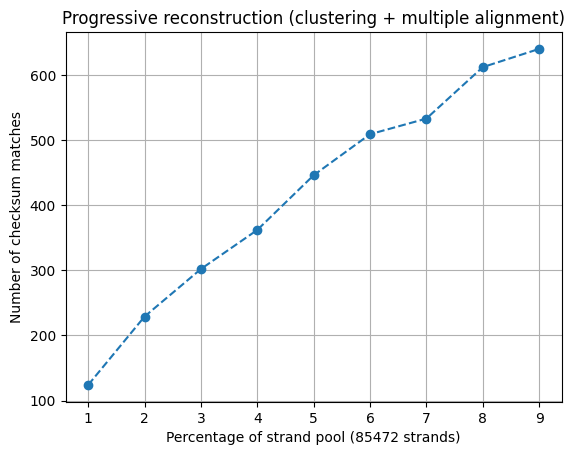

In [23]:
plt.plot(percentages, found_strands_arr, marker='o', linestyle='dashed')
plt.xlabel("Percentage of strand pool (85472 strands)")
plt.ylabel("Number of checksum matches")
plt.title("Progressive reconstruction (clustering + multiple alignment)")
plt.grid()

In [136]:
found_strands_arr

[128, 650, 755, 773, 793, 796, 791, 786, 802, 802]

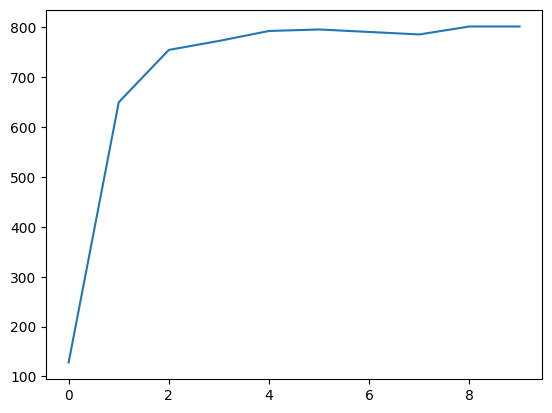

In [137]:
plt.plot(found_strands_arr)

In [121]:
cluster_obj.run_pipeline()

Clustering strands
Total strands 1000


100%|██████████| 1000/1000 [00:02<00:00, 442.40it/s]


Number of clusters = 588
Clusters are sorted
Orientation fixed in the strand pool
Generating 1300 candidates


100%|██████████| 588/588 [00:17<00:00, 34.59it/s]


In [105]:
checksum_obj = CheckSum4(reference_length=204)

In [106]:
print(len(set(original_strands).intersection(set(cluster_obj.candidates))))

787


In [115]:
valid_checksums_no_guesses, found_indices = checksum_obj.decode(candidates=cluster_obj.candidates, n_reference_strands=1004, clustered_seqs=cluster_obj.clustered_seqs, n_guesses=5, guesses=False)

100%|██████████| 1150/1150 [00:00<00:00, 21731.56it/s]

808 direct checksum matches found
-4 extra found after guessing
0.021144278606965175 were reversed
804 Valid checksum strands found


In [119]:
len(set(valid_checksums))

844

In [117]:
len(set(valid_checksums).intersection(set(original_strands_no_checksum)))

840

In [112]:
original_strands_no_checksum = [i[:-4] for i in original_strands]

In [109]:
print(valid_checksums.index(t))

NameError: name 't' is not defined

In [65]:
found_indices[594]

630

In [70]:
checksum_obj.decode_quateranary(cluster_obj.candidates[632][-4:])

2

In [44]:
for i in valid_checksums:
    if not i in original_strands_no_checksum:
        t = i

In [54]:
counter = 0

for i in valid_checksums:
    if i in original_strands_no_checksum:
        counter += 1

In [57]:
checksum_ids = [str(uuid.uuid4()) for i in range(len(valid_checksums))]

In [ ]:
checksum_ids = [str(uuid.uuid4()) for i in range(len(valid_checksums))]
create_fasta_file(ids=checksum_ids, strands=valid_checksums, output_filepath=r'C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\decoded\1_TWIST_decoded_1incorrect.fasta')

File saved as C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\decoded\1_TWIST_decoded_1incorrect.fasta


### Analysing data

In [242]:
# Use edit distance to find the best targets
# Align to figure out the insertions, deletions and subsitutions

reference_marker_strand_pool_cleaned = []
reference_edit_distances_cleaned = []
reverse_markers = []

for i in tqdm(strand_pool[:5000]):
    min_distance = 300
    reference = -1

    rev_strand = reverse_complement(i)  # badread no adapters - adapters are front first regardless
    rev_flag = False
    for ind, j in enumerate(original_strands):
        edit_distance = distance(i, j)
        edit_distance_rev = distance(rev_strand, j)
        if edit_distance < min_distance:
            reference = ind
            min_distance = edit_distance
            rev_flag = False
        
        if edit_distance_rev < min_distance:
            reference = ind
            min_distance = edit_distance_rev
            rev_flag = True

    reverse_markers.append(rev_flag)
    reference_marker_strand_pool_cleaned.append(reference)
    reference_edit_distances_cleaned.append(min_distance)


100%|██████████| 5000/5000 [01:36<00:00, 51.80it/s] 


In [243]:
strand_pool = [reverse_complement(strand_pool[ind]) if reverse_markers[ind] == True else strand_pool[ind] for ind in range(5000)]

In [244]:
aligner = Align.PairwiseAligner()
aligner.match_score = 2
aligner.mismatch_score = -1
aligner.gap_score = -5
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1

In [245]:
def get_ids(aligned_str1, aligned_str2):

    insertions = 0
    deletions = 0
    substitutions = 0

    insertion_positions = []
    deletion_positions = []
    substitution_positions = []

    ind = 0
    for a, b in zip(aligned_str1, aligned_str2):
        if a == '-' and b != '-':
            insertions += 1
            insertion_positions.append(ind)
        elif a != '-' and b == '-':
            deletions += 1
            deletion_positions.append(ind)
        elif a != b:
            substitutions += 1
            substitution_positions.append(ind)
        ind += 1

    reference_length = len(aligned_str1)

    return [
        insertions / reference_length, deletions / reference_length, substitutions / reference_length], [
        insertion_positions, deletion_positions, substitution_positions
    ]

    

In [246]:
alignment_objects = []

for ind, strand in tqdm(enumerate(strand_pool[:5000]), total=len(cleaned_strand_pool)):
    if len(strand) > 0:
        aligned = aligner.align(strand, original_strands[reference_marker_strand_pool_cleaned[ind]])[0]
        alignment_objects.append(aligned)

  4%|▍         | 5000/113433 [00:05<01:52, 966.84it/s] 


In [247]:
ids_rates = []
ids_positions = []


for obj in alignment_objects:
    ids, positions = get_ids(obj[0], obj[1])
    ids_rates.append(ids)
    ids_positions.append(positions)

Simple analysis

In [248]:

junk_reads = 0
good_ids = np.array([0.0, 0.0, 0.0])
n_good_reads = 0
for ids in ids_rates:
    if sum(ids) > 0.3:
        junk_reads += 1
    else:
        good_ids += ids
        n_good_reads +=1

In [249]:
good_ids / n_good_reads * 100

array([5.47960235, 4.04462837, 2.2933798 ])

In [256]:
junk_reads / 5000 * 100

4.9799999999999995

In [251]:
# Position of error
insertion_along_length = np.zeros(208)
deletion_along_length = np.zeros(208)
subsitution_along_length = np.zeros(208)
along_length = [deletion_along_length, insertion_along_length, subsitution_along_length]
n_good_reads = 0

for ind2, i in enumerate(ids_positions):
    if sum(ids_rates[ind2]) < 0.3:
        for ind, j in enumerate(i):
            for k in j:
                if k >= 208:
                    continue
                along_length[ind][k] += 1
        n_good_reads += 1

In [252]:
along_length = [i / n_good_reads for i in along_length]

Text(0, 0.5, 'Subsitution probability')

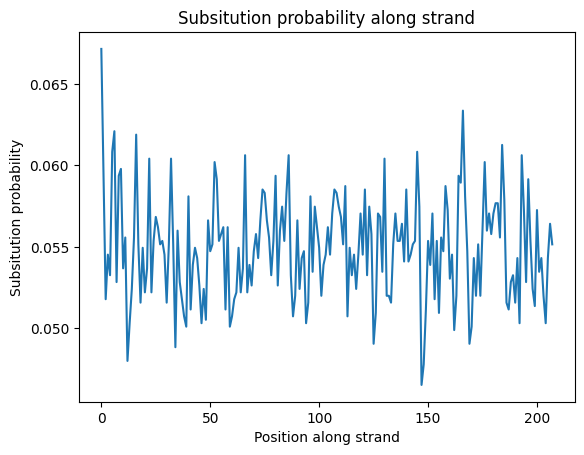

In [ ]:
plt.plot(along_length[0])
plt.title("Deletion probability along strand")
plt.xlabel("Position along strand")
plt.ylabel("Deletion probability")

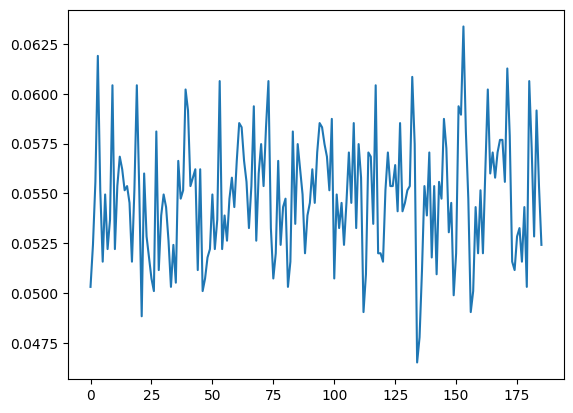

In [254]:
plt.plot(along_length[0][13:199])

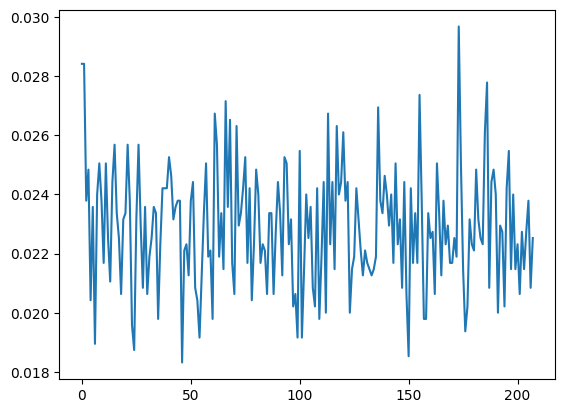

In [255]:
plt.plot(along_length[2])

Writing original strands to a fasta file for running Badread

In [172]:
from utils import create_fasta_file
import uuid 

ids = [str(uuid.uuid4()) for i in range(len(original_strands))]

create_fasta_file(ids, original_strands, output_filepath='jpeg_seq.fasta')

File saved as jpeg_seq.fasta


### Reconstruction via clustering (remove primers, cluster, align, checksum)

In [ ]:
# Removing adapters and filtering length
front_adapter = 'CATGAAGTGGAGTAGCGGCG'
reverse_adapter = 'GCGACCGATGCTCACTGATC'

rev_front = reverse_complement(reverse_adapter)
rev_back = reverse_complement(front_adapter)

cleaned_strand_pool = []
cleaned_strand_ids = []

for ind, i in enumerate(strand_pool):
    
    if front_adapter in i[:20]:
        if reverse_adapter in i[-21:]:
            cleaned_strand = i[20: -21]
            
            if len(cleaned_strand) > 200 and len(cleaned_strand) < 230:
                cleaned_strand_pool.append(cleaned_strand)
                cleaned_strand_ids.append(strand_ids[ind])
    if rev_front in i[:20]:
        if rev_back in i[-21:]:
            cleaned_strand = reverse_complement(i[20:-21])
            if len(cleaned_strand) > 200 and len(cleaned_strand) < 230:
                cleaned_strand_pool.append(cleaned_strand)
                cleaned_strand_ids.append(strand_ids[ind])

I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here

In [32]:
len(cleaned_strand_pool)

16692

In [169]:
obj = Clustering(strand_pool=cleaned_strand_pool, reference_length=208, strand_pool_ids=strand_ids, front_adapter=front_adapter, reverse_adapter=reverse_adapter, n_reference_strands=800)

In [170]:
obj.run_pipeline(remove_adapters=False)

Filtering strands by length
0.18230659025787965 strands filtered out
Clustering strands
Total strands 6849


100%|██████████| 6849/6849 [00:20<00:00, 328.55it/s]


Number of clusters = 966
Clusters are sorted
Orientation fixed in the strand pool
Generating 1000 candidates


100%|██████████| 850/850 [01:07<00:00, 12.68it/s]


Evaluating candidates


0it [00:00, ?it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [59]:
strand_pool[7]

'CATGAAGTGGAGTAGCGGCGCATGGAGTGGATAACTGCGGTAACTGATCCACCATGTCTCATAGGTCAACGTACTAGAGGGCTTACCTAAGGCGAACCTTAGCATTTATCAGAGTGAGCCGAGCATTGATTAGACCTATGAGACATGGTGGATCAGTTACCGCAGTTATCCCACTCCATGCGCCACTACTCCACTCATGA'

In [ ]:
front_adapter

'CATGAAGTGGAGTAGCGGCG'

In [92]:
df = pd.read_csv(r"C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\cat_FFDX_checksum.csv")

In [107]:
len(original_strands)

1031

In [98]:
check = CheckSum4(reference_length=204)

In [171]:
len(set(obj.candidates).intersection(set(original_strands)))

386

In [173]:
decoded_strands = check.decode(obj.candidates, n_reference_strands=1031, clustered_seqs=obj.clustered_seqs, n_guesses=5, guesses=True)

100%|██████████| 850/850 [00:00<00:00, 16185.77it/s]


394 direct checksum matches found
Making guesses


100%|██████████| 456/456 [02:09<00:00,  3.51it/s]

26 extra found after guessing
0.002380952380952381 were reversed
420 Valid checksum strands found


In [133]:
original_strands_ = [i[:-4] for i in original_strands]

In [135]:
len(set(decoded_strands).intersection(set(original_strands_)))

882

In [140]:
len(original_strands)

1031

In [145]:
create_fasta_file(ids=[str(uuid.uuid4()) for i in range(len(decoded_strands))], strands=decoded_strands, output_filepath=r"C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\1_Twist_decoded.fasta")

File saved as C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\1_Twist_decoded.fasta
